In [10]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import keras

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
import pathlib


In [13]:
dict_characters={1:'crack',
                 2:'noncrack'}

train_data_dir = pathlib.Path('C://Users//Kiruthiga//Desktop//wallcrack//dataset//train')
test_data_dir = pathlib.Path('C://Users//Kiruthiga//Desktop//wallcrack//dataset//test')
image_count = len(list(train_data_dir.glob('*/*.jpg')))
image_count

2500

In [14]:
batch_size = 4
img_height = 180
img_width = 180

In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="training",
  seed=2020,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2500 files belonging to 2 classes.
Using 2000 files for training.


In [16]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=2020,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2500 files belonging to 2 classes.
Using 500 files for validation.


In [17]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    seed=2020,
    image_size=(img_height, img_width),
    batch_size=batch_size,)

Found 1000 files belonging to 2 classes.


In [18]:
class_names = train_ds.class_names
print(class_names)

['crack', 'noncrack']


In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(4, 180, 180, 3)
(4,)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
normalization_layer = layers.Rescaling(1./255)

In [22]:
tf.random.set_seed(
    2020
 )

In [23]:
num_classes = 5

In [25]:
#normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_ds))
#first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
#print(np.min(first_image), np.max(first_image))

In [26]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [28]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
500/500 [==============================] - 242s 475ms/step - loss: 0.3383 - accuracy: 0.8685 - val_loss: 0.1391 - val_accuracy: 0.9680
Epoch 2/10
500/500 [==============================] - 235s 469ms/step - loss: 0.2756 - accuracy: 0.9195 - val_loss: 0.0752 - val_accuracy: 0.9860
Epoch 3/10
500/500 [==============================] - 200s 400ms/step - loss: 0.2255 - accuracy: 0.9300 - val_loss: 0.1561 - val_accuracy: 0.9740
Epoch 4/10
500/500 [==============================] - 207s 414ms/step - loss: 0.2365 - accuracy: 0.9035 - val_loss: 0.0542 - val_accuracy: 0.9880
Epoch 5/10
500/500 [==============================] - 199s 398ms/step - loss: 0.0614 - accuracy: 0.9810 - val_loss: 0.1404 - val_accuracy: 0.9800
Epoch 6/10
500/500 [==============================] - 197s 394ms/step - loss: 0.2518 - accuracy: 0.9020 - val_loss: 0.1091 - val_accuracy: 0.9800
Epoch 7/10
500/500 [==============================] - 197s 394ms/step - loss: 0.1398 - accuracy: 0.9525 - val_loss: 0.0734 -

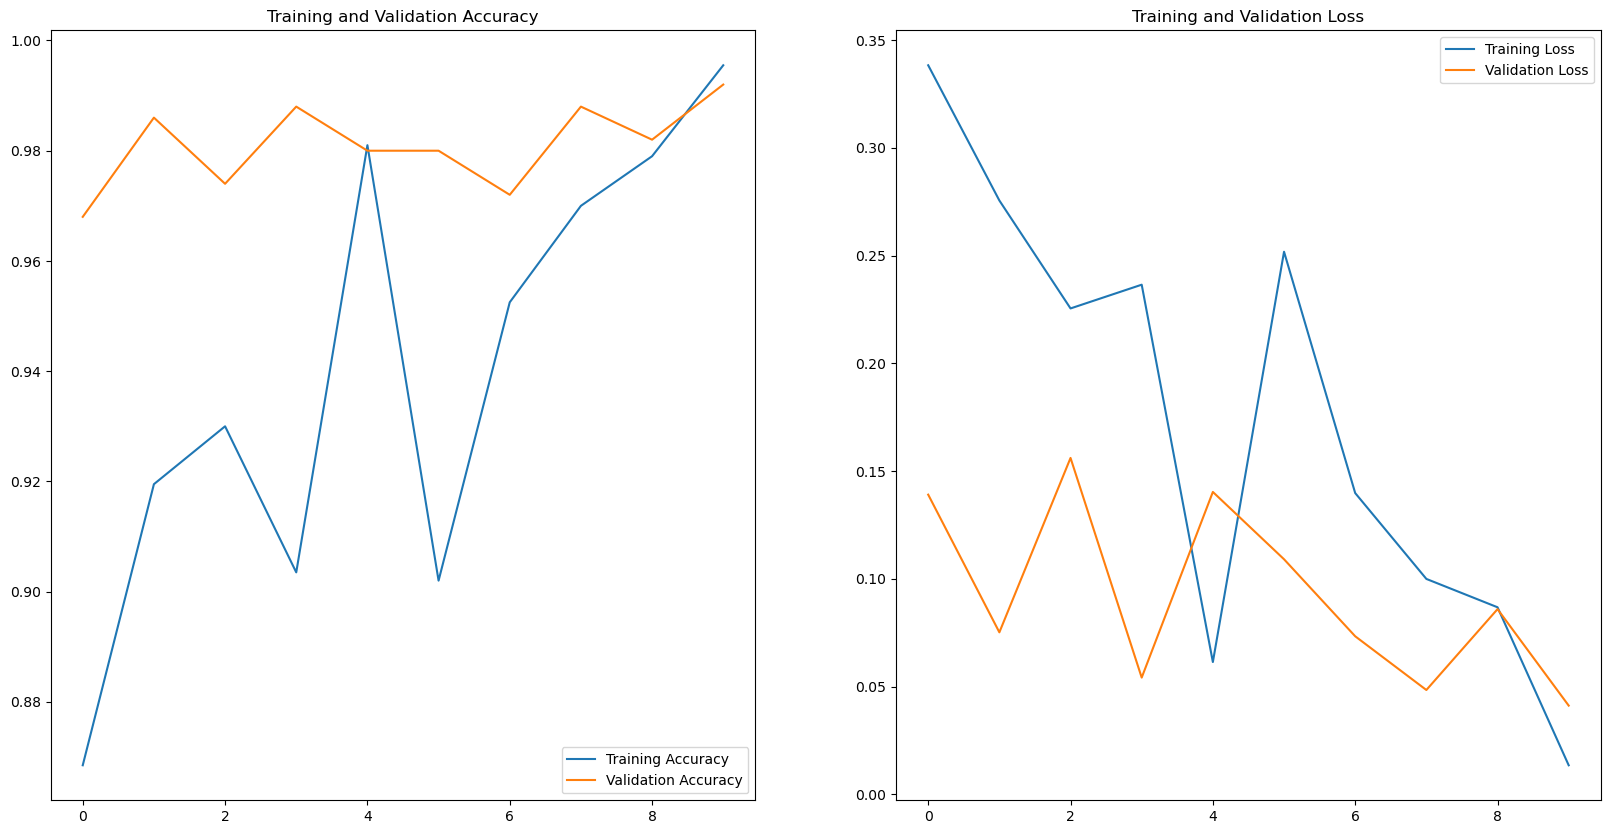

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [48]:
crack_url = "C://Users//Kiruthiga//Desktop//wallcrack//dataset//test//crack//03134.jpg"



In [54]:
crack_path = tf.keras.utils.get_file('crack', orgin = crack_url)

TypeError: get_file() got an unexpected keyword argument 'orgin'

In [49]:
crack_path = tf.keras.utils.get_file('crack', origin=crack_url)

Exception: URL fetch failure on C://Users//Kiruthiga//Desktop//wallcrack//dataset//test//crack//03134.jpg: None -- unknown url type: c

In [50]:
img = tf.keras.utils.load_img(
    crack_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))


SyntaxError: unexpected EOF while parsing (1647137728.py, line 12)

In [55]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

KeyboardInterrupt: 

In [ ]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [ ]:
interpreter.get_signature_list()

In [ ]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [ ]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [ ]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

In [ ]:
print(np.max(np.abs(predictions - predictions_lite)))